# Load the Dataset

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df=pd.read_csv('data/NiV_Data.csv')
df.set_index('Year')

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
Year,,,,,,,,,,,,,
2001,136578600,23,1049,32505706,104072893,33.24,18.28,139.92,2198.861157,73.42,25.94,13,9
2002,138612896,24,1065,33960159,104652737,33.44,17.68,156.25,2127.613884,73.17,25.82,0,0
2003,140647193,25,1080,35443092,105204100,33.52,18.08,141.08,2159.296860,73.67,25.75,12,8
2004,142681489,25,1096,36954505,105726983,33.55,18.02,195.58,2112.044628,72.67,25.88,67,50
2005,144715786,26,1112,38494399,106221386,33.67,18.73,219.75,2092.132562,72.83,26.24,12,11
2006,146213025,27,1123,40033126,106179898,34.62,18.65,159.92,2205.117025,71.42,26.47,0,0
2007,147710264,28,1134,41595210,106115053,33.90,18.29,240.42,2246.405950,73.17,25.71,18,9
2008,149207503,28,1146,43180651,106026851,33.67,18.34,184.75,2384.648926,73.42,25.88,11,7
2009,150704742,29,1157,44789449,105915292,34.66,18.68,160.92,2155.826777,70.25,26.52,4,1


In [2]:
prev = 100614628
next = 100651123

val = (next - prev) / next

print(f"{val * 100}")

0.036258909898104166


# Fig 1. Geographical Heatmap of Infected Cases in Bangladesh (2001 - 2024)

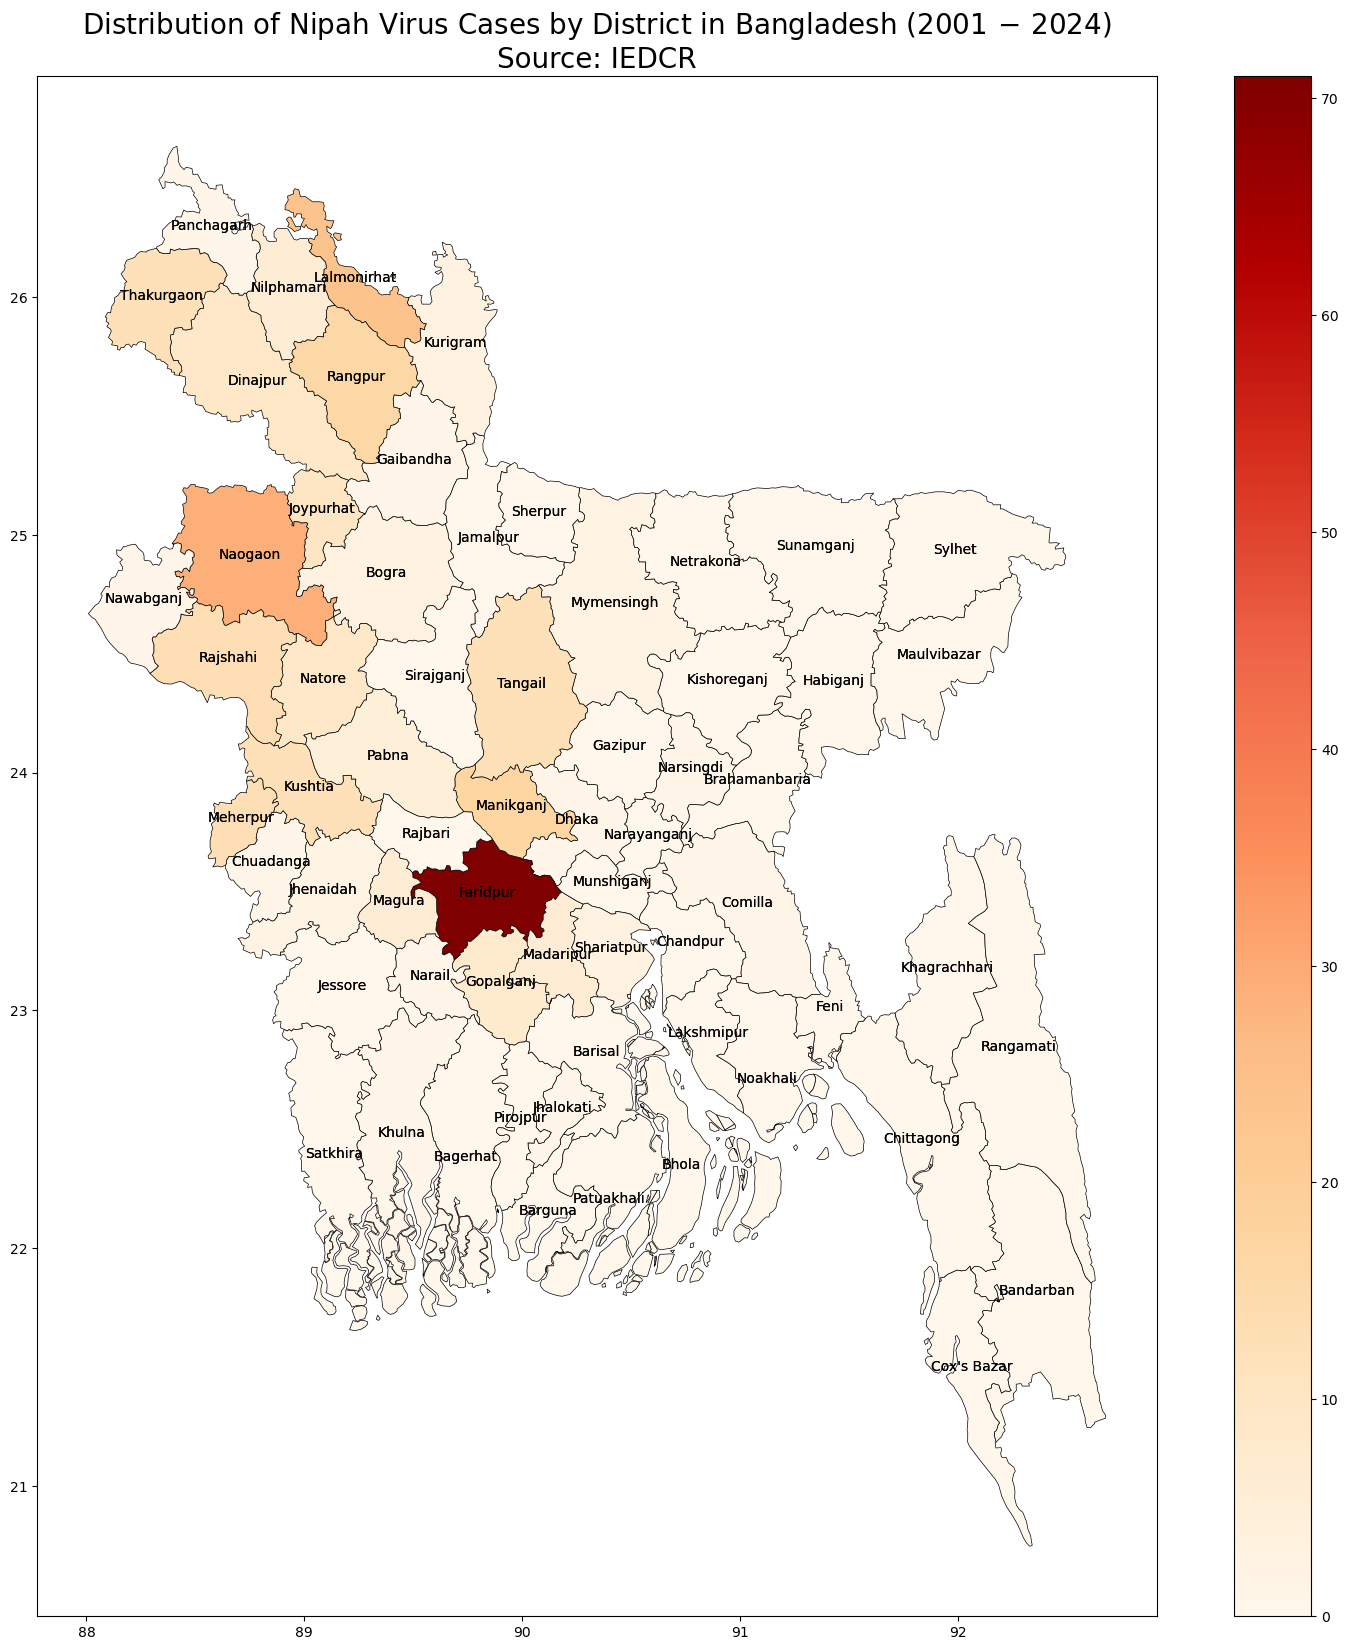

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file for districts
geojson_path = './geodata/small_bangladesh_geojson_adm2_64_districts_zillas.json'
districts_zillas = gpd.read_file(geojson_path)

# Provided districts and infection data
districts = [
    "Nawabganj", "Panchagarh", "Thakurgaon", "Nilphamari", "Dinajpur", "Lalmonirhat",
    "Kurigram", "Rangpur", "Gaibandha", "Joypurhat", "Naogaon", "Rajshahi", "Bogra",
    "Natore", "Mymensingh", "Tangail", "Meherpur", "Kushtia", "Pabna", "Manikganj",
    "Dhaka", "Chuadanga", "Jhenaidah", "Magura", "Faridpur", "Narsingdi", "Comilla",
    "Narail", "Gopalganj", "Madaripur", "Shariatpur", "Khulna", "Jhalokati"
]

infected = [
    1, 1, 12, 6, 9, 24, 3, 16, 1, 10, 29, 13, 3, 9, 2, 12, 13, 12, 5, 17, 1, 1, 2, 6, 71,
    1, 1, 1, 8, 6, 3, 1, 1
]

# Align infection data with districts in the GeoJSON
district_names = districts_zillas['ADM2_EN'].values
district_data = {k: v for k, v in zip(districts, infected)}
districts_zillas['Infected'] = districts_zillas['ADM2_EN'].map(district_data).fillna(0)

infected = []
for name in district_names:
    if name in districts:
        infected.append(district_data[name])
    else:
        infected.append(0)

districts_zillas['Infected'] = infected

# Plot the updated map
fig, ax = plt.subplots(figsize=(20, 20))
ax = districts_zillas.plot(ax=ax, edgecolor='black', column='Infected', markersize=10, legend=True, cmap="OrRd", linewidth=0.5)

districts_zillas.apply(
    lambda x: ax.annotate(
        text=x.ADM2_EN, xy=x.geometry.centroid.coords[0], ha="center"
    ),
    axis=1,
)

# Add title and subtitle
ax.set_title("Distribution of Nipah Virus Cases by District in Bangladesh $(2001\,-\,2024)$\nSource: IEDCR",
             fontsize=20)

# Annotate districts with names
districts_zillas.apply(
    lambda x: ax.annotate(
        text=x['ADM2_EN'], xy=x.geometry.centroid.coords[0], ha='center'
    ),
    axis=1
)

# Save the plot, as PNG for PDF
plt.savefig("imagesFinal/NiV_BD_heatmap_with_names.png", dpi=220, format="png", bbox_inches="tight")

# Save the plot, as EPS for LaTeX
plt.savefig("imagesFinal/NiV_BD_heatmap_with_names.eps", dpi=220, format="eps", bbox_inches="tight")

plt.show()

# Fig 2 NiV Infections, Deaths, and CFR in Bangladesh (2001 - 2024)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


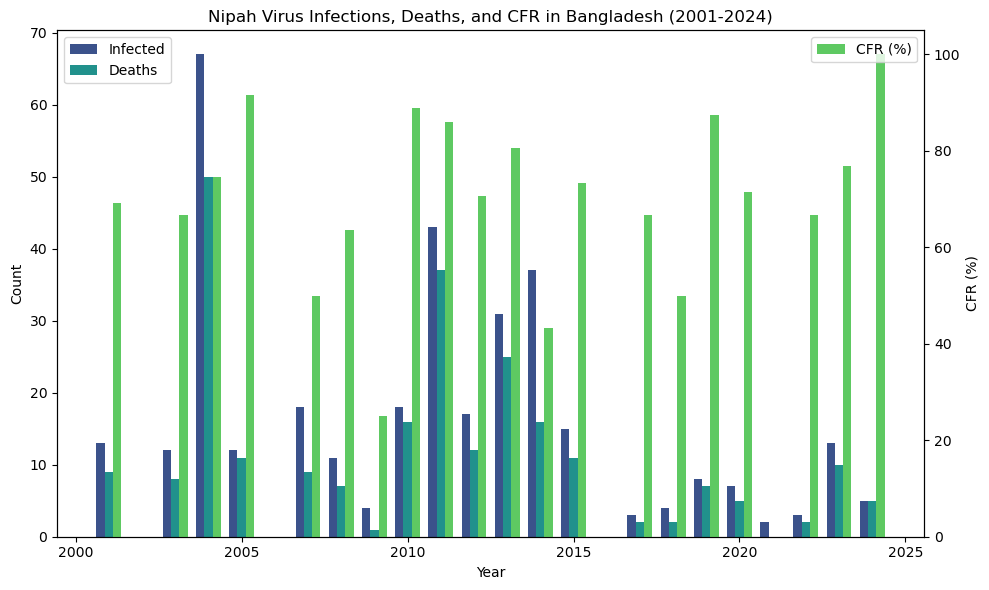

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated dataset
nipah_data_updated = pd.read_csv('data/NiV_Data.csv')

# Calculate the Case Fatality Rate (CFR) in percentage
nipah_data_updated['CFR (%)'] = (nipah_data_updated['Death'] / nipah_data_updated['Infected']) * 100

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the width of the bars and the x-axis variable
width = 0.25
x = nipah_data_updated['Year']

# Define the color palette
colors = sns.color_palette('viridis', 3)

# Plot Infected and Death counts on the primary y-axis
ax1.bar(x - width, nipah_data_updated['Infected'], width=width, label='Infected', color=colors[0])
ax1.bar(x, nipah_data_updated['Death'], width=width, label='Deaths', color=colors[1])

# Set labels for the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Nipah Virus Infections, Deaths, and CFR in Bangladesh (2001-2024)')

# Create a secondary y-axis for CFR
ax2 = ax1.twinx()

# Plot CFR as a bar plot on the secondary y-axis
ax2.bar(x + width, nipah_data_updated['CFR (%)'], width=width, label='CFR (%)', color=colors[2])

# Set labels for the secondary y-axis
ax2.set_ylabel('CFR (%)')

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/nipah_infections_deaths_cfr.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/nipah_infections_deaths_cfr.eps', dpi=220, format='eps', bbox_inches='tight')

plt.show()

# Summary of the Dataset for different parameters

In [5]:
# Convert the appropriate columns to numeric types, if necessary
numeric_columns = ['Max T', 'Min T', 'Rainfall', 'Humidity', 'Dry-Bulb T', 'Infected', 'Death', 'Avg_Precipitation', 'Avg_Population', 'Avg_Urban', 'Avg_Rural']
existing_columns = [col for col in numeric_columns if col in df.columns]
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = df.dropna()

# Handle missing values by filling with the median
data = df.fillna(df.median())

# Drop the year column
data_summary = data.drop(columns=['Year']).describe(include='all').round(decimals=2)

# Display the stats
data_summary

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
count,2.400000e+01,24.00,24.00,24.00,2.400000e+01,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,1.554893e+08,32.29,1194.21,51505153.21,1.039841e+08,34.24,19.12,170.21,2201.93,71.90,26.51,14.29,10.21
std,1.075121e+07,5.83,82.57,12439755.89,1.983911e+06,1.07,1.66,55.53,106.51,2.23,1.05,15.97,12.12
min,1.365786e+08,23.00,1049.00,32505706.00,1.006146e+08,32.78,17.68,110.75,1971.07,64.00,25.71,0.00,0.00
25%,1.473360e+08,27.75,1131.25,41204689.00,1.024296e+08,33.63,18.38,137.36,2127.60,70.69,25.92,3.75,2.00
50%,1.557926e+08,32.50,1196.50,50791397.00,1.045594e+08,34.19,18.66,156.17,2192.67,72.54,26.24,11.50,7.50
75%,1.638778e+08,37.25,1258.75,61448221.00,1.057403e+08,34.63,19.16,187.46,2284.23,73.23,26.54,17.25,11.25
max,1.735624e+08,42.00,1333.00,72896192.00,1.062214e+08,38.33,26.11,350.00,2384.65,75.00,30.00,67.00,50.00


# Fig 3 Seasonal Decomposition of the Data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


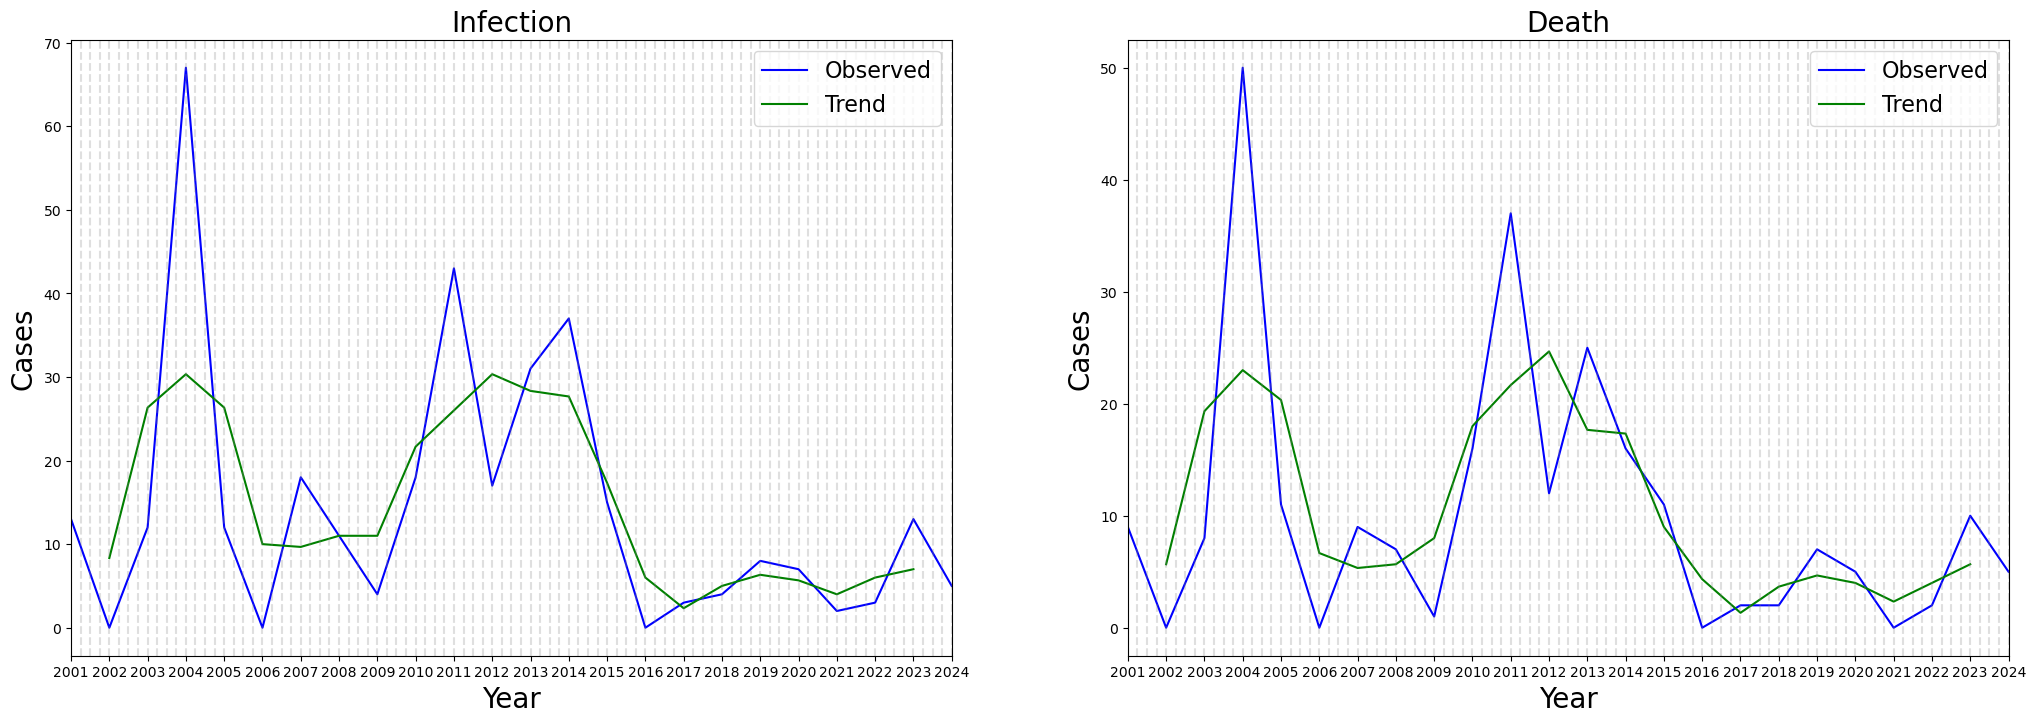

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import matplotlib.pyplot as plt
import numpy as np

output_dir = "imagesFinal"

# Decompose the time series for 'Infected'
decomposition_infected = seasonal_decompose(
    df["Infected"], model="additive", period=3
)

# Decompose the time series for 'Death'
decomposition_death = seasonal_decompose(df["Death"], model="additive", period=3)

# Generate x-axis labels for quarters (2001 Q1 to 2024 Q4)
years = np.arange(2001, 2025)
quarters = np.linspace(2001, 2024.75, num=(2024 - 2001 + 1) * 4)  # 4 quarters per year

fig, axes = plt.subplots(1, 2, figsize=(25, 8), sharex=True)

# Plot for 'Infected'
axes[0].plot(years, decomposition_infected.observed, label="Observed", color="blue")
axes[0].plot(years, decomposition_infected.trend, label="Trend", color="green")
axes[0].set_title("Infection", fontsize=20)
axes[0].set_xlabel("Year", fontsize=20)
axes[0].set_ylabel("Cases", fontsize=20)
axes[0].grid(False)
axes[0].legend(fontsize=16)

# Add vertical lines for each quarter
for quarter in quarters:
    axes[0].axvline(x=quarter, color="gray", linestyle="--", alpha=0.25)

# Plot for 'Death'
axes[1].plot(years, decomposition_death.observed, label="Observed", color="blue")
axes[1].plot(years, decomposition_death.trend, label="Trend", color="green")
axes[1].set_title("Death", fontsize=20)
axes[1].set_xlabel("Year", fontsize=20)
axes[1].set_ylabel("Cases", fontsize=20)
axes[1].grid(False)
axes[1].legend(fontsize=16)

# Add vertical lines for each quarter
for quarter in quarters:
    axes[1].axvline(x=quarter, color="gray", linestyle="--", alpha=0.25)

# Set x-axis limits and ticks for both plots
axes[0].set_xlim(2001, 2024)
axes[0].set_xticks(np.arange(2001, 2025, step=1))  # Tick every year
axes[1].set_xlim(2001, 2024)
axes[1].set_xticks(np.arange(2001, 2025, step=1))  # Tick every year

# Save the plot
output_path = os.path.join(output_dir, "time_series_decomposition_infected_death.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "time_series_decomposition_infected_death.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Fig 4 Climatic Factor Trends in Bangladesh (2001 - 2024)

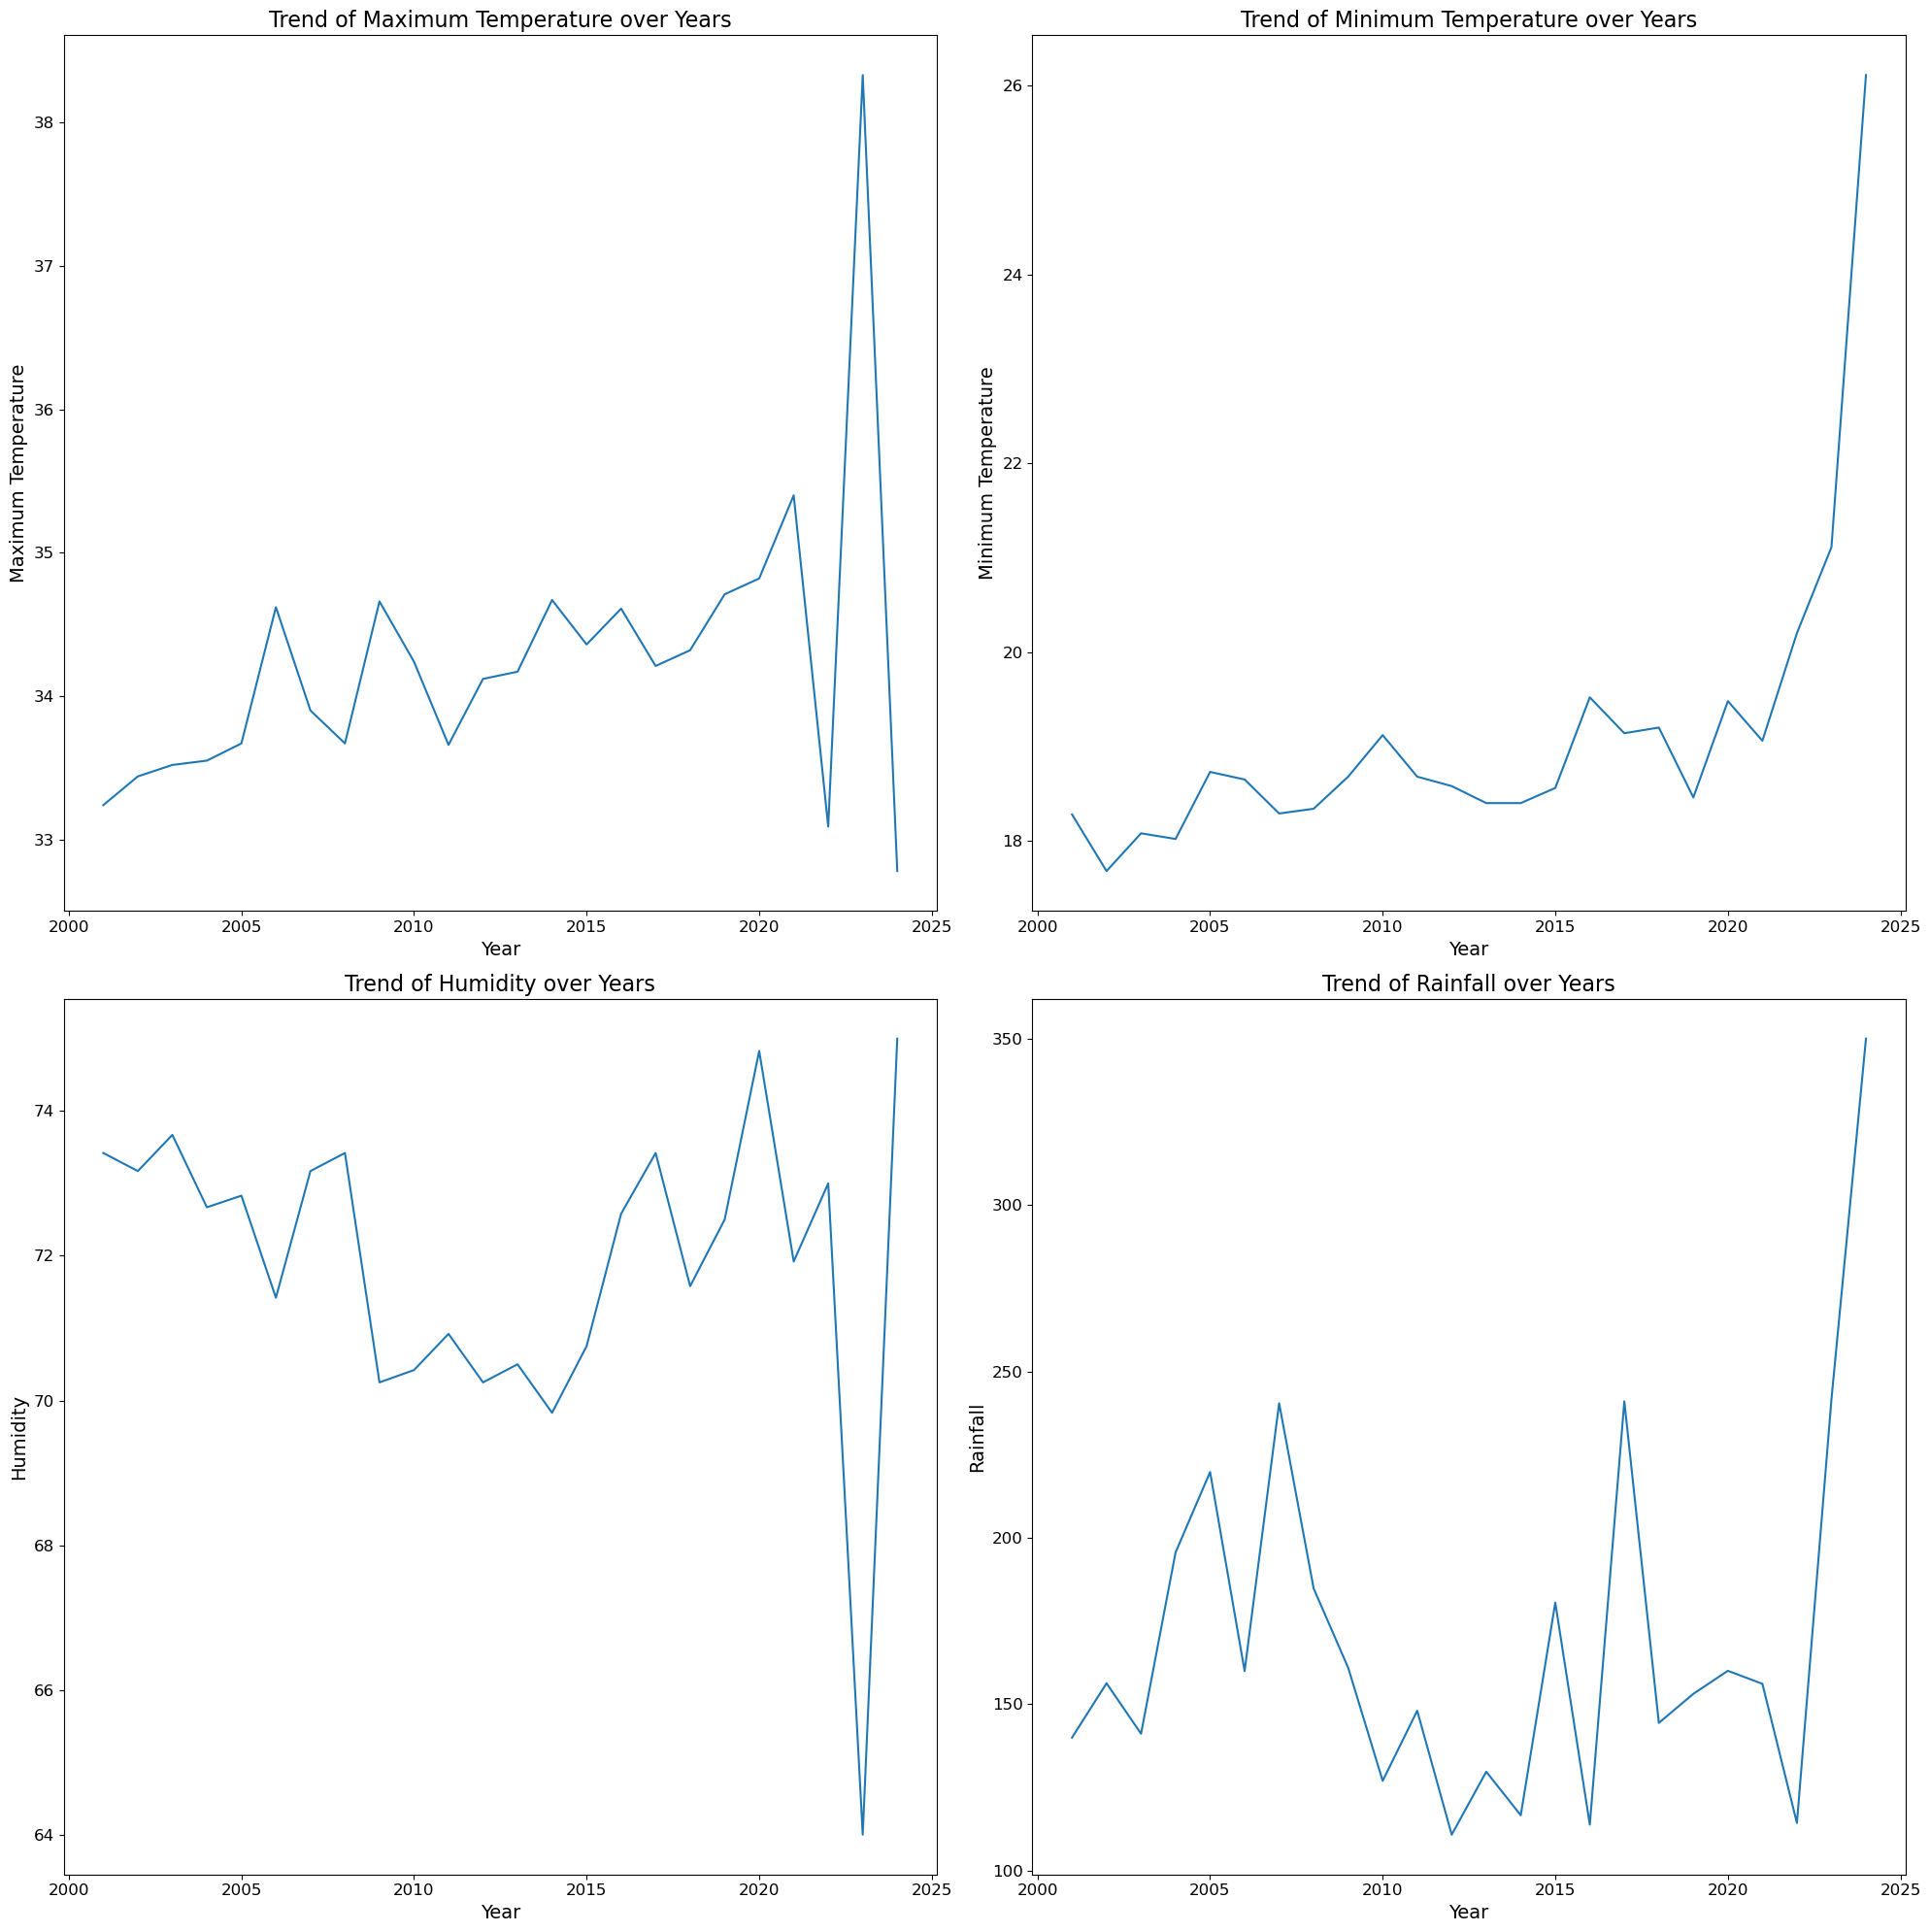

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plot Max T trend
sns.lineplot(ax=axes[0, 0], x='Year', y='Max T', data=df)
axes[0, 0].set_title('Trend of Maximum Temperature over Years', fontsize=16)
axes[0, 0].set_xlabel('Year', fontsize=14)
axes[0, 0].set_ylabel('Maximum Temperature', fontsize=14)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot Min T trend
sns.lineplot(ax=axes[0, 1], x='Year', y='Min T', data=df)
axes[0, 1].set_title('Trend of Minimum Temperature over Years', fontsize=16)
axes[0, 1].set_xlabel('Year', fontsize=14)
axes[0, 1].set_ylabel('Minimum Temperature', fontsize=14)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)

# Plot Humidity trend
sns.lineplot(ax=axes[1, 0], x='Year', y='Humidity', data=df)
axes[1, 0].set_title('Trend of Humidity over Years', fontsize=16)
axes[1, 0].set_xlabel('Year', fontsize=14)
axes[1, 0].set_ylabel('Humidity', fontsize=14)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot Rainfall trend
sns.lineplot(ax=axes[1, 1], x='Year', y='Rainfall', data=df)
axes[1, 1].set_title('Trend of Rainfall over Years', fontsize=16)
axes[1, 1].set_xlabel('Year', fontsize=14)
axes[1, 1].set_ylabel('Rainfall', fontsize=14)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/climate_trends.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/climate_trends.eps', dpi=220, format='eps', bbox_inches='tight')

# Display the plots
plt.tight_layout()
plt.show()

# Normalized Explanatory Variables

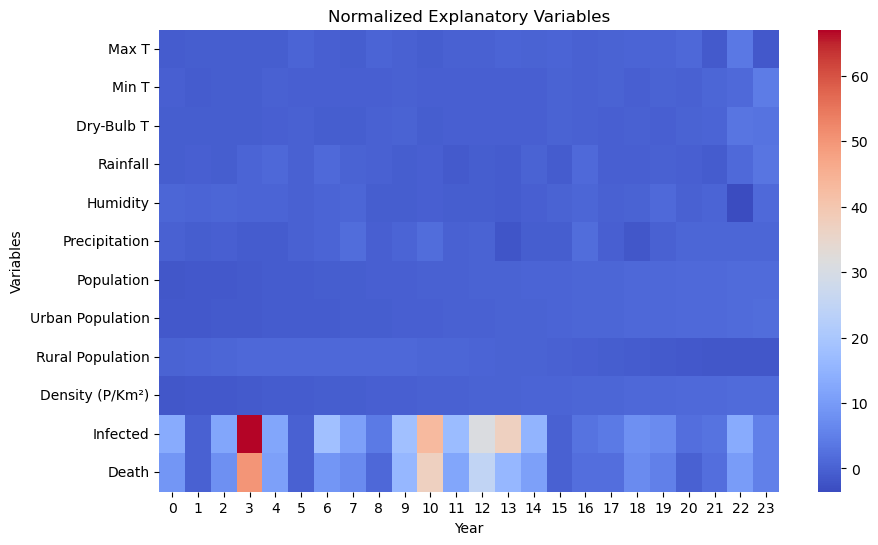

In [8]:
normalized_data = data[
    [
        "Max T",
        "Min T",
        "Dry-Bulb T",
        "Rainfall",
        "Humidity",
        "Precipitation",
        "Population",
        "Urban Population",
        "Rural Population",
        "Density (P/Km²)",
    ]
]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data["Infected"] = data["Infected"]

# Add the Death column to normalized data for better comparison
normalized_data["Death"] = data["Death"]

# Display the normalized data
normalized_data.head().reset_index(drop=True)

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/normalized_explanatory_variables.png', dpi=220, format='png')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/normalized_explanatory_variables.eps', dpi=220, format="eps")

# Display the plot
plt.show()

# Fig 5 Parwise Correlation Plot of the Data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 2000x2000 with 0 Axes>

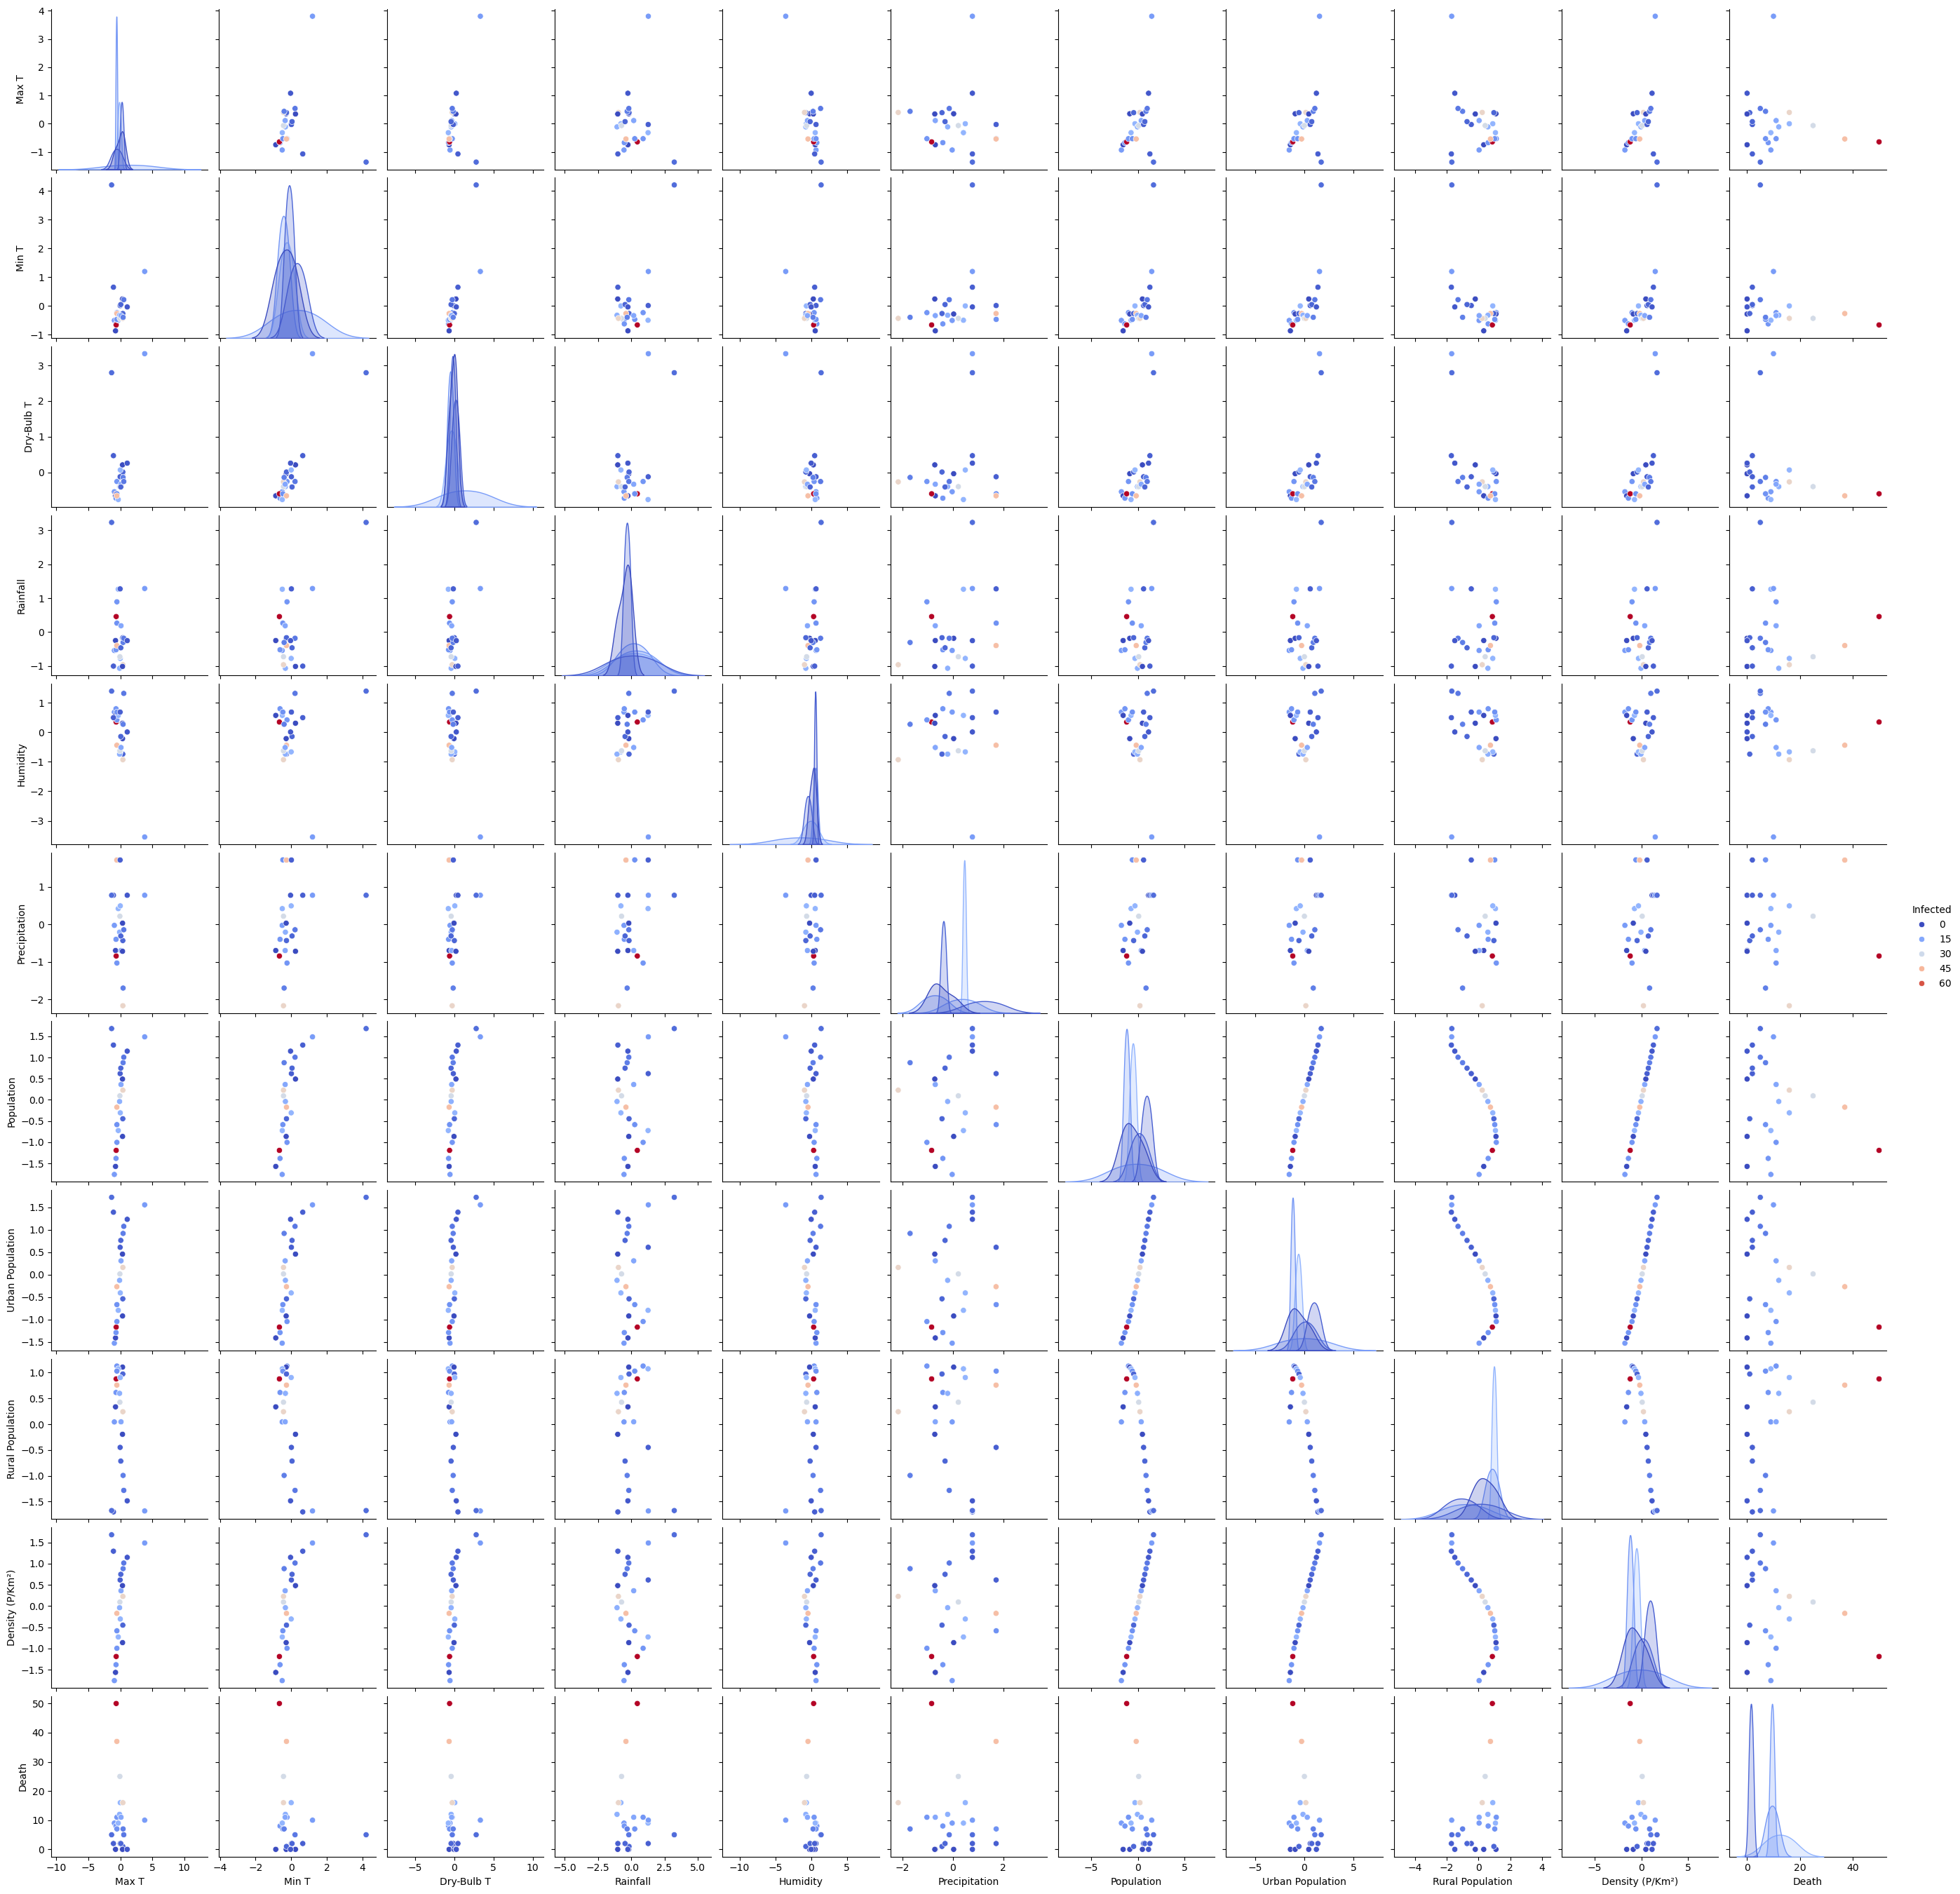

In [9]:
# Plot the pairplot
fig = plt.figure(figsize=(20, 20))
sns.pairplot(normalized_data, hue='Infected', height=2.5, kind='scatter', diag_kind='kde', palette='coolwarm')

# Set the title
# plt.suptitle('Pair wise plot of Normalized Explanatory Variables')

# Set the x and y labels for each plot in the pairplot
for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=512)
    ax.set_ylabel(ax.get_ylabel(), fontsize=512)

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/pairplot.png', dpi=1000, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/pairplot.eps', dpi=1000, format='eps', bbox_inches='tight')

# Display the plot
# plt.tight_layout()
plt.show()

# Fig 6 Heatmap of Correlation Matrix

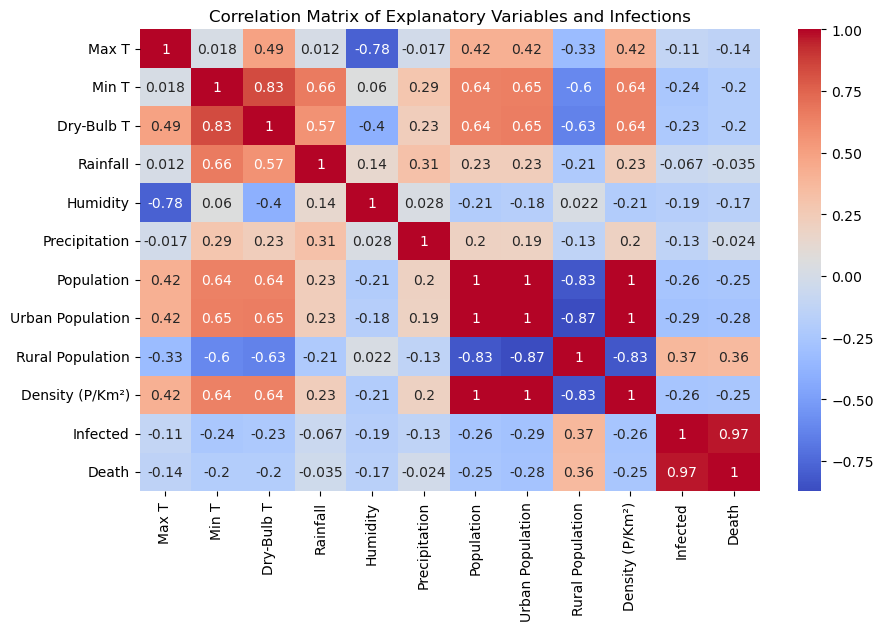

In [10]:
# Step 1: Calculate the correlation matrix
correlation_matrix = normalized_data.corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Explanatory Variables and Infections")

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/correlation_matrix.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/correlation_matrix.eps', dpi=220, format="eps", bbox_inches="tight")

# Display the plot
plt.show()

# Fig 7 Global Perspective of NiV Infections and Deaths (2001 - 2024)

In [11]:
import pandas as pd

# Data for Nipah virus cases and deaths
data = {
    "country": ["Malaysia", "Singapore", "Bangladesh", "India", "Philippines"],
    "cases": [283, 11, 352, 91, 17],
    "deaths": [109, 1, 261, 63, 9]
}
df = pd.DataFrame(data)

# Display the dataframe
df.set_index('country')

,cases,deaths
country,,
Malaysia,283,109
Singapore,11,1
Bangladesh,352,261
India,91,63
Philippines,17,9


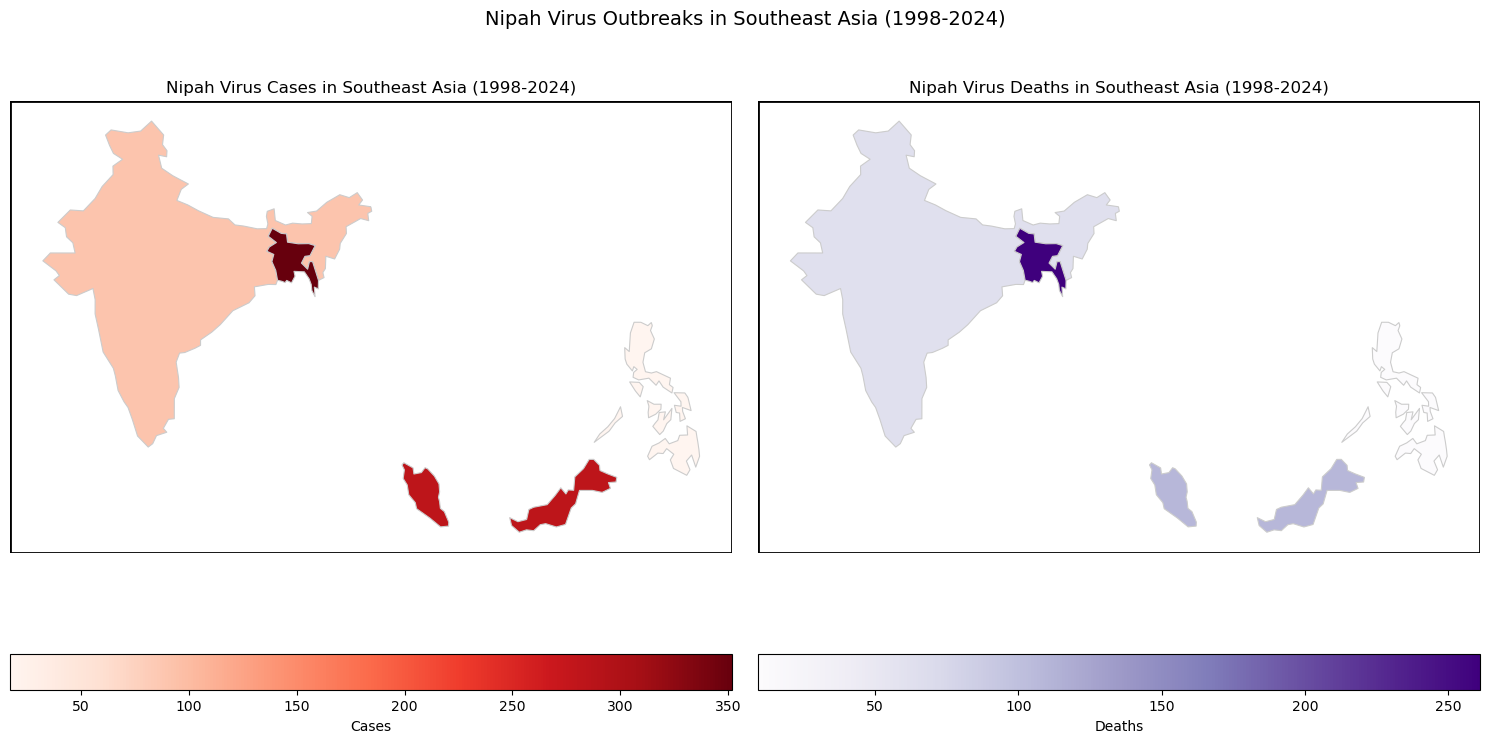

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the world map shapefile and handle multi-part geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).explode(index_parts=True).reset_index(drop=True)

# Filter the map to focus on Southeast Asia countries affected by NiV
countries_of_interest = ["Malaysia", "Singapore", "Bangladesh", "India", "Philippines"]
southeast_asia = world[world['name'].isin(countries_of_interest)]

# Merge data with geometry
southeast_asia = southeast_asia.merge(df, left_on="name", right_on="country")

# Create side-by-side plots for cases and deaths
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot for Nipah Virus Cases
southeast_asia.plot(
    column='cases', 
    cmap='Reds', 
    linewidth=0.8, 
    ax=ax[0], 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "Cases", 'orientation': "horizontal"}
)
ax[0].set_title("Nipah Virus Cases in Southeast Asia (1998-2024)")
ax[0].axis('off')

# Draw a border around the first subplot
rect1 = patches.Rectangle((0, 0), 1, 1, transform=ax[0].transAxes, 
                          fc="none", ec="black", lw=2)
ax[0].add_patch(rect1)

# Plot for Nipah Virus Deaths
southeast_asia.plot(
    column='deaths', 
    cmap='Purples', 
    linewidth=0.8, 
    ax=ax[1], 
    edgecolor='0.8', 
    legend=True,
    legend_kwds={'label': "Deaths", 'orientation': "horizontal"}
)
ax[1].set_title("Nipah Virus Deaths in Southeast Asia (1998-2024)")
ax[1].axis('off')

# Draw a border around the second subplot
rect2 = patches.Rectangle((0, 0), 1, 1, transform=ax[1].transAxes, 
                          fc="none", ec="black", lw=2)
ax[1].add_patch(rect2)

# Add a main title for the whole figure
plt.suptitle("Nipah Virus Outbreaks in Southeast Asia (1998-2024)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title better

# Save the plot as a EPS file with high resolution
plt.savefig("imagesFinal/nipah_virus_outbreaks.eps", dpi=300)

# Save the plot as a PNG file with high resolution
plt.savefig("imagesFinal/nipah_virus_outbreaks.png", dpi=300)

# Display the plot
plt.show()